# CO<sub>2</sub> Mole Fraction: Mauna Loa

Dataset is available at:
https://gml.noaa.gov/dv/data/index.php?parameter_name=Carbon%2BDioxide&search=mauna+loa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

To download the data file, we'll use wget which is a program that is available on most Linux distributions.

In [1]:
!wget https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/co2_mlo_surface-flask_1_ccgg_event.txt

--2021-11-09 15:13:44--  https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/co2_mlo_surface-flask_1_ccgg_event.txt
Resolving gml.noaa.gov (gml.noaa.gov)... 140.172.200.41, 2610:20:8800:6101::29
Connecting to gml.noaa.gov (gml.noaa.gov)|140.172.200.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1584198 (1.5M) [text/plain]
Saving to: ‘co2_mlo_surface-flask_1_ccgg_event.txt’

co2_mlo_surface-fla 100%[===================>]   1.51M  1.49MB/s    in 1.0s    

2021-11-09 15:13:46 (1.49 MB/s) - ‘co2_mlo_surface-flask_1_ccgg_event.txt’ saved [1584198/1584198]



Open the text file and navigate down to where the data begins (line 71). **Notice that the Header line (line naming each data column) begins with a # character. This will confuse pandas when we try to read in the header information. Delete the # character and the whitespace after it, then run the next cell to read in the file!**

In [7]:
co2flask = pd.read_csv("co2_mlo_surface-flask_1_ccgg_event.txt", sep="\s+", header=70)

In [8]:
co2flask

,sample_site_code,sample_year,sample_month,sample_day,sample_hour,sample_minute,sample_seconds,sample_id,sample_method,parameter_formula,...,analysis_day,analysis_hour,analysis_minute,analysis_seconds,sample_latitude,sample_longitude,sample_altitude,sample_elevation,sample_intake_height,event_number
0,MLO,1969,8,20,17,55,0,33-69,N,co2,...,9,9,2,0,19.5300,-155.5800,3399.0,3397.0,2.0,78808
1,MLO,1969,8,20,17,55,0,34-69,N,co2,...,9,9,12,0,19.5300,-155.5800,3399.0,3397.0,2.0,78809
2,MLO,1969,8,20,18,30,0,31-69,N,co2,...,9,8,58,0,19.5300,-155.5800,3399.0,3397.0,2.0,78810
3,MLO,1969,8,20,18,30,0,32-69,N,co2,...,9,9,0,0,19.5300,-155.5800,3399.0,3397.0,2.0,78811
4,MLO,1969,8,27,19,15,0,35-69,N,co2,...,9,8,42,0,19.5300,-155.5800,3399.0,3397.0,2.0,78812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,MLO,2020,12,22,20,24,0,4805-99,P,co2,...,13,11,20,10,19.5362,-155.5763,3402.0,3397.0,5.0,484255
10125,MLO,2020,12,31,18,40,0,1645-99,S,co2,...,28,12,32,51,19.5362,-155.5763,3437.0,3397.0,40.0,484817
10126,MLO,2020,12,31,18,40,0,4170-99,S,co2,...,28,12,47,8,19.5362,-155.5763,3437.0,3397.0,40.0,484818
10127,MLO,2020,12,31,19,17,0,4180-99,P,co2,...,28,12,4,16,19.5362,-155.5763,3402.0,3397.0,5.0,484815


In [9]:
co2flask.columns

Index(['sample_site_code', 'sample_year', 'sample_month', 'sample_day',
       'sample_hour', 'sample_minute', 'sample_seconds', 'sample_id',
       'sample_method', 'parameter_formula', 'analysis_group_abbr',
       'analysis_value', 'analysis_uncertainty', 'analysis_flag',
       'analysis_instrument', 'analysis_year', 'analysis_month',
       'analysis_day', 'analysis_hour', 'analysis_minute', 'analysis_seconds',
       'sample_latitude', 'sample_longitude', 'sample_altitude',
       'sample_elevation', 'sample_intake_height', 'event_number'],
      dtype='object')

In [10]:
co2flask.analysis_value

0        323.17
1        324.72
2        331.02
3       -999.99
4       -999.99
          ...  
10124    414.21
10125    415.44
10126    415.51
10127    415.62
10128    415.52
Name: analysis_value, Length: 10129, dtype: float64

<AxesSubplot:ylabel='CO$_2$ mole fraction (ppm)'>

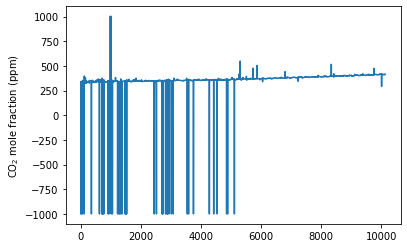

In [12]:
co2flask.analysis_value.plot(ylabel="CO$_2$ mole fraction (ppm)")

The negative values we see above are invalid data points. You can use boolean arrays to select valid data. Here, invalid data points are filled with a fill value of -999.99. We use a boolean selector below to select rows that do not have this fill value.

In [13]:
co2flask.analysis_value != -999.990

0         True
1         True
2         True
3        False
4        False
         ...  
10124     True
10125     True
10126     True
10127     True
10128     True
Name: analysis_value, Length: 10129, dtype: bool

In [14]:
selvalid = co2flask.analysis_value != -999.990

In [16]:
co2flask.analysis_value

0        323.17
1        324.72
2        331.02
3       -999.99
4       -999.99
          ...  
10124    414.21
10125    415.44
10126    415.51
10127    415.62
10128    415.52
Name: analysis_value, Length: 10129, dtype: float64

<AxesSubplot:>

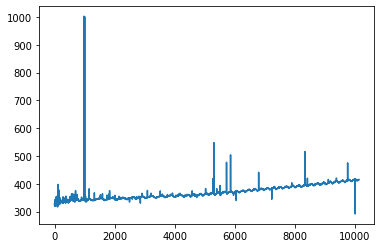

In [17]:
co2flask.loc[selvalid].analysis_value.plot()

In [18]:
co2flask.loc[:, "analysis_flag"]

0        ..L
1        +..
2        *..
3        *..
4        *..
        ... 
10124    ...
10125    ...
10126    ...
10127    ...
10128    ...
Name: analysis_flag, Length: 10129, dtype: object

Let's select data that is marked as good quality. For details on the quality flag used by the NOAA lab, see Section 7.5 in this [README file](https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/README_surface_flask_co2.html)

In [22]:
False | False | False | True

True

In [23]:
sel_good = (co2flask.analysis_flag == "..H") | (co2flask.analysis_flag == "...") | (co2flask.analysis_flag == "..L") | (co2flask.analysis_flag == "..I")

In [24]:
sel_good

0         True
1        False
2        False
3        False
4        False
         ...  
10124     True
10125     True
10126     True
10127     True
10128     True
Name: analysis_flag, Length: 10129, dtype: bool

<AxesSubplot:>

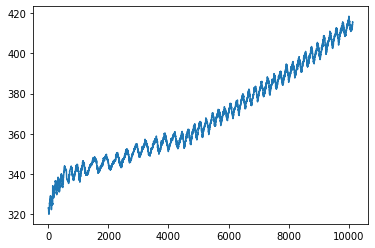

In [25]:
co2flask.loc[sel_good, "analysis_value"].plot()

In [34]:
co2flask.sample_year.astype("str")  + "-" + co2flask.sample_month.astype("str") +"-"+co2flask.sample_day.astype(str)\
+"T"+co2flask.sample_hour.astype(str)+":"+co2flask.sample_minute.astype(str)+":"+co2flask.sample_seconds.astype(str)

0         1969-8-20T17:55:0
1         1969-8-20T17:55:0
2         1969-8-20T18:30:0
3         1969-8-20T18:30:0
4         1969-8-27T19:15:0
                ...        
10124    2020-12-22T20:24:0
10125    2020-12-31T18:40:0
10126    2020-12-31T18:40:0
10127    2020-12-31T19:17:0
10128    2020-12-31T19:17:0
Length: 10129, dtype: object

In [35]:
co2flask["datetime"] = pd.to_datetime(co2flask.sample_year.astype(str)+"-"+co2flask.sample_month.astype(str)+"-"+co2flask.sample_day.astype(str)+\
                                      "T"+co2flask.sample_hour.astype(str)+":"+co2flask.sample_minute.astype(str)+":"+co2flask.sample_seconds.astype(str))

In [36]:
co2flask["datetime"]

0       1969-08-20 17:55:00
1       1969-08-20 17:55:00
2       1969-08-20 18:30:00
3       1969-08-20 18:30:00
4       1969-08-27 19:15:00
                ...        
10124   2020-12-22 20:24:00
10125   2020-12-31 18:40:00
10126   2020-12-31 18:40:00
10127   2020-12-31 19:17:00
10128   2020-12-31 19:17:00
Name: datetime, Length: 10129, dtype: datetime64[ns]

In [41]:
co2flask["datetime"]

0       1969-08-20 17:55:00
1       1969-08-20 17:55:00
2       1969-08-20 18:30:00
3       1969-08-20 18:30:00
4       1969-08-27 19:15:00
                ...        
10124   2020-12-22 20:24:00
10125   2020-12-31 18:40:00
10126   2020-12-31 18:40:00
10127   2020-12-31 19:17:00
10128   2020-12-31 19:17:00
Name: datetime, Length: 10129, dtype: datetime64[ns]

In [42]:
co2flask = co2flask.loc[sel_good]

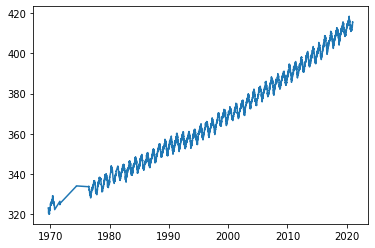

In [48]:
plt.plot(co2flask.datetime, co2flask.analysis_value)

In [46]:
co2flask.datetime.dt.year

0        1969
6        1969
10       1969
12       1969
13       1969
         ... 
10124    2020
10125    2020
10126    2020
10127    2020
10128    2020
Name: datetime, Length: 9163, dtype: int64

In [47]:
co2flask.groupby(co2flask.datetime.dt.year)["analysis_value"].mean()

datetime
1969    321.607586
1970    325.956364
1971    325.397727
1974    334.065000
1976    330.861818
1977    333.438765
1978    335.039146
1979    336.848916
1980    339.396842
1981    339.817016
1982    341.307952
1983    342.397103
1984    344.571255
1985    345.763272
1986    346.869659
1987    349.105550
1988    351.628363
1989    352.859086
1990    354.425830
1991    355.830984
1992    356.915282
1993    357.245864
1994    358.829676
1995    360.938287
1996    362.727560
1997    364.085000
1998    366.969153
1999    368.668168
2000    369.933583
2001    371.487708
2002    373.346327
2003    376.208696
2004    377.787026
2005    380.203204
2006    382.085317
2007    384.012031
2008    385.808333
2009    387.566127
2010    389.930521
2011    391.847047
2012    394.005838
2013    396.825846
2014    398.981313
2015    401.033231
2016    404.340591
2017    406.600408
2018    408.724467
2019    411.661429
2020    413.897385
Name: analysis_value, dtype: float64

Time averaging over annual time-scales removes the seasonal variations

In [54]:
co2flask.datetime.dt.year

0        1969
6        1969
10       1969
12       1969
13       1969
         ... 
10124    2020
10125    2020
10126    2020
10127    2020
10128    2020
Name: datetime, Length: 9163, dtype: int64

In [53]:
co2flask.groupby(co2flask.datetime.dt.year)["analysis_value"].mean()

Int64Index([1969, 1970, 1971, 1974, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='datetime')

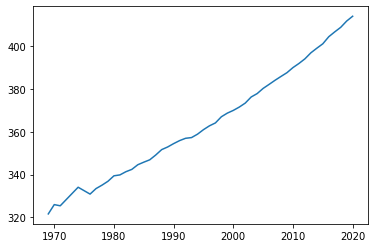

In [49]:
years = co2flask.datetime.dt.year.unique()
plt.plot(years, co2flask.groupby(co2flask.datetime.dt.year)["analysis_value"].mean())

In [56]:
co2flask.analysis_value

0        323.17
6        322.87
10       322.90
12       320.79
13       320.44
          ...  
10124    414.21
10125    415.44
10126    415.51
10127    415.62
10128    415.52
Name: analysis_value, Length: 9163, dtype: float64

## Linear regression

Let's use the ordinary least squares technique to fit a straight line to the data. Before we do that, we need to convert our time column into a single unit (either seconds, or minutes, or hours, or days etc.), here I've chosen to convert into "Days since the first observation". 

In [63]:
np.timedelta64?

Init signature: np.timedelta64(self, /, *args, **kwargs)
Docstring:     
A timedelta stored as a 64-bit integer.

See :ref:`arrays.datetime` for more information.

:Character code: ``'m'``
File:           ~/.local/lib/python3.8/site-packages/numpy/__init__.py
Type:           type
Subclasses:     


In [65]:
(co2flask['datetime'] - co2flask['datetime'][0]) / np.timedelta64(1,'D')

0            0.000000
6            7.079861
10          13.086806
12          22.996528
13          22.996528
             ...     
10124    18752.103472
10125    18761.031250
10126    18761.031250
10127    18761.056944
10128    18761.056944
Name: datetime, Length: 9163, dtype: float64

In [61]:
co2flask['date_delta'] = (co2flask['datetime'] - co2flask['datetime'].min())  / np.timedelta64(1,'D')

/tmp/ipykernel_2517/961071716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2flask['date_delta'] = (co2flask['datetime'] - co2flask['datetime'].min())  / np.timedelta64(1,'D')


In [62]:
co2flask.date_delta

0            0.000000
6            7.079861
10          13.086806
12          22.996528
13          22.996528
             ...     
10124    18752.103472
10125    18761.031250
10126    18761.031250
10127    18761.056944
10128    18761.056944
Name: date_delta, Length: 9163, dtype: float64

<br>

### Next we perform the [simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression) using ordinary least squares technique to fit a linear curve to the observed data:

Let $t_i, c_i$ be the time and CO2 mole fraction at every i'th measurement, where i ranges from 1 to N (with N being the total number of measurements).

Then, we can estimate the value of $c_i$ with an estimator $y_i$ such that the sqaures of the residuals $(c_i - y_i)^2$ is minimized:

$$ y_i = a x_i + b $$

Where $a$ is the slope of the fitted line given by the following formula:

$$ a = \frac{\Sigma (t_i - \bar{t}) (c_i - \bar{c} ) }{\Sigma (t_i - \bar{t})^2} $$

$b = \bar{c} - a \bar{t}$ is the intercept of this line on the Y axis (note that the over-bar denotes averaging).


### Exercise 09: Linear regression

1. Try solving these equations by writing your own code to get the linear curve for our data.
1. Compute the linear regression curve using functions in scipy or numpy.

In [74]:
t = co2flask["date_delta"]

In [76]:
c = co2flask["analysis_value"]

In [79]:
tmean = t.mean()

In [80]:
tmean

10576.154031678327

In [81]:
cmean  = c.mean()

In [82]:
cmean

369.04598930481285

In [91]:
anum = ((t - tmean) * (c - cmean)).sum()

In [92]:
adenom = ((t - tmean)**2).sum()

In [93]:
a = anum / adenom

In [94]:
a

0.00499479128446204

In [95]:
b = cmean - a * tmean

In [96]:
b

316.2203073242579

In [101]:
co2flask.datetime

0       1969-08-20 17:55:00
6       1969-08-27 19:50:00
10      1969-09-02 20:00:00
12      1969-09-12 17:50:00
13      1969-09-12 17:50:00
                ...        
10124   2020-12-22 20:24:00
10125   2020-12-31 18:40:00
10126   2020-12-31 18:40:00
10127   2020-12-31 19:17:00
10128   2020-12-31 19:17:00
Name: datetime, Length: 9163, dtype: datetime64[ns]

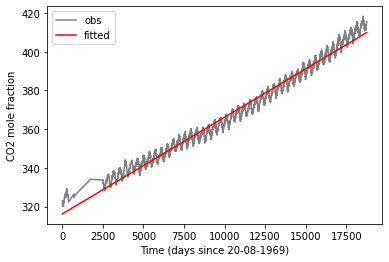

In [102]:
plt.plot(t, c, label="obs", color="gray")

plt.plot(t, a*t+b, label="fitted", color="r")

plt.xlabel("Time (days since 20-08-1969)")
plt.ylabel("CO2 mole fraction")

plt.legend()

In [95]:
# %load ./solutions/sol_linear_regression.py

In [106]:
a

0.00499479128446204

In [112]:
param = np.polyfit(t, c, 1)

In [113]:
param

array([4.99479128e-03, 3.16220307e+02])

In [110]:
param[0]

9.884416996849845e-08

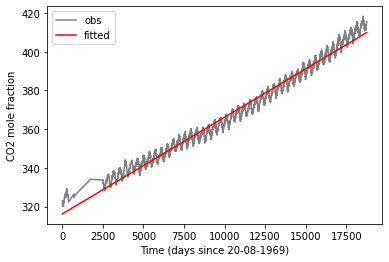

In [119]:
plt.plot(t, c, label="obs", color="gray")
plt.plot(t, param[0]*t + param[1], label="fitted", color="r")
plt.close()
plt.xlabel("Time (days since 20-08-1969)")
plt.ylabel("CO2 mole fraction")

plt.legend()

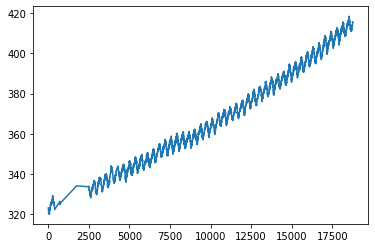

In [120]:
plt.plot(t, c )

<br>

#### We don't have to write our own code, scipy provides us with a package that does this for us. 

Solving it by writing out the equations yourself helps you learn to write your own functions! But in many cases, there are many commonly available algorithms that have already been implemented in popular Python packages.

Now let's do the same with functions from the scipy package. Try solving the problem by refering to the documentation on the following pages:

1. [Linear regression in scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html)
1. [Curve_fitting in scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

[4.99479130e-03 3.16220307e+02] [[ 5.18225851e-11 -5.48083643e-07]
 [-5.48083643e-07  6.86660103e-03]]


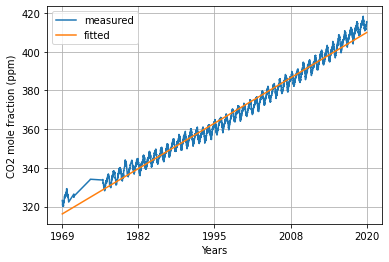

In [116]:
# %load ./solutions/sol_linear_curve_fit.py
import scipy.optimize as optimize

def fit_func(x, a, b):
    return a*x + b

popt, pcov = optimize.curve_fit(fit_func, co2flask.date_delta, co2flask.analysis_value.values)

print(popt, pcov)

ax = plt.subplot()

ax.plot(co2flask.date_delta, co2flask.analysis_value, label="measured")
ax.plot(co2flask.date_delta, fit_func(co2flask.date_delta.values, *popt), label="fitted")

xticks = np.linspace(co2flask.date_delta.values[0], co2flask.date_delta.values[-1], 5)
xtick_indices = []
for i in range(len(xticks)):
    idx = np.argmin(np.abs(co2flask.date_delta.values - xticks[i]))
    xtick_indices.append(idx)
ax.set_xticks(np.linspace(co2flask.date_delta.values[0], co2flask.date_delta.values[-1], 5))
ax.set_xticklabels(co2flask.datetime.iloc[xtick_indices].dt.year)

ax.set_ylabel("CO2 mole fraction (ppm)")
ax.set_xlabel("Years")

plt.grid()

plt.legend()

Next, try fitting a higher order polynomial function to the data by changing the function that you send to the curve_fit function. Try sending a quadratic function (a polynomial of order 2).

[9.88441678e-08 2.86095024e-03 3.25691080e+02] [[ 1.72155660e-18 -3.71648445e-14  1.64951268e-10]
 [-3.71648445e-14  8.34313467e-10 -3.89940805e-06]
 [ 1.64951268e-10 -3.89940805e-06  2.00450863e-02]]


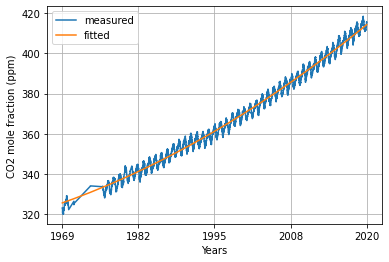

In [117]:
# %load ./solutions/sol_poly2_curve_fit.py
def fit_func_polynomial(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = optimize.curve_fit(fit_func_polynomial, co2flask.date_delta.values, co2flask.analysis_value.values)

print(popt, pcov)

ax = plt.subplot()

ax.plot(co2flask.date_delta, co2flask.analysis_value, label="measured")
ax.plot(co2flask.date_delta.values, fit_func_polynomial(co2flask.date_delta, *popt), label="fitted")

xticks = np.linspace(co2flask.date_delta.values[0], co2flask.date_delta.values[-1], 5)
xtick_indices = []
for i in range(len(xticks)):
    idx = np.argmin(np.abs(co2flask.date_delta.values - xticks[i]))
    xtick_indices.append(idx)
ax.set_xticks(np.linspace(co2flask.date_delta.values[0], co2flask.date_delta.values[-1], 5))
ax.set_xticklabels(co2flask.datetime.iloc[xtick_indices].dt.year)

ax.set_ylabel("CO2 mole fraction (ppm)")
ax.set_xlabel("Years")

plt.grid()

plt.legend()